# Importing the Neccessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Defining the independent variables,range and granualarity



In [ ]:
# Define the independent variable name
independent_variable = "Temperature (°C)"

# Define the range for the independent variable
range_start = 0
range_end = 30

# Define the granularity of the values(step size)
granularity = 1

# Define names of the fuzzy sets
fuzzy_set_names = ["Cold", "Warm"]


#Defining the membership functions

In [ ]:
# Define membership functions for each fuzzy set
def cold(x):
    if x <= 15:
        return max(0, (15 - x) / 15)           # x less than 15 degrees then we got
    else:
        return 0

def warm(x):
    if x >= 15:
        return max(0, (x - 15) / 15)          # x is greater than 15 degrees then we get the fuzzy set as hot
    else:
        return 0

membership_functions = {
    "Cold": lambda x: cold(x),
    "Warm": lambda x: warm(x)
}


#Define union,interesection and complement

In [ ]:
# Define functions for calculating Union, Intersection, and Complement
def fuzzy_union(f1, f2, x):
    return max(f1(x), f2(x))

def fuzzy_intersection(f1, f2, x):
    return min(f1(x), f2(x))

def fuzzy_complement(f, x):
    return 1 - f(x)



#Calculating the values for union,intersection and complement

In [ ]:

# Calculate the Union, Intersection, and Complement for the entire range
x_values = np.arange(range_start, range_end + granularity, granularity)

union_values = {}
intersection_values = {}
complement_values = {}

for i in range(len(fuzzy_set_names)):
    for j in range(i + 1, len(fuzzy_set_names)):
        union_values[(fuzzy_set_names[i], fuzzy_set_names[j])] = [fuzzy_union(membership_functions[fuzzy_set_names[i]], membership_functions[fuzzy_set_names[j]], x) for x in x_values]
        intersection_values[(fuzzy_set_names[i], fuzzy_set_names[j])] = [fuzzy_intersection(membership_functions[fuzzy_set_names[i]], membership_functions[fuzzy_set_names[j]], x) for x in x_values]

for fuzzy_set_name in fuzzy_set_names:
    complement_values[fuzzy_set_name] = [fuzzy_complement(membership_functions[fuzzy_set_name], x) for x in x_values]


#Plotting the Results

In [ ]:
# Print membership functions
print("Membership functions:")
for fuzzy_set_name, function in membership_functions.items():
    print(f"{fuzzy_set_name}: {function}")


Membership functions:
Cold: <function <lambda> at 0x7a3da7ea8d30>
Warm: <function <lambda> at 0x7a3da7ea8dc0>


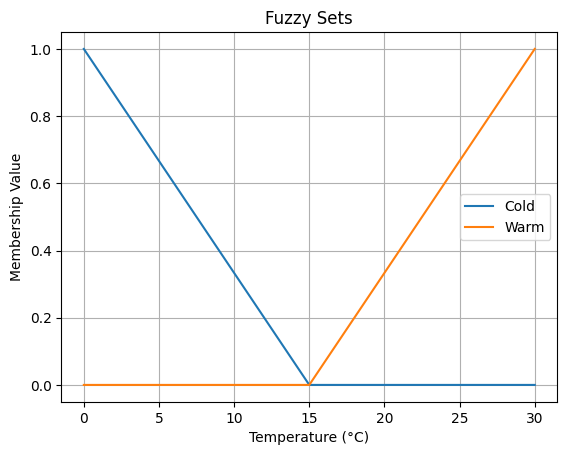

In [ ]:
# Plot individual fuzzy sets
for fuzzy_set_name in fuzzy_set_names:
    plt.plot(x_values, [membership_functions[fuzzy_set_name](x) for x in x_values], label=fuzzy_set_name)

plt.title("Fuzzy Sets")
plt.xlabel(independent_variable)
plt.ylabel("Membership Value")
plt.legend()
plt.grid(True)
plt.show()


Union of the Fuzzy sets



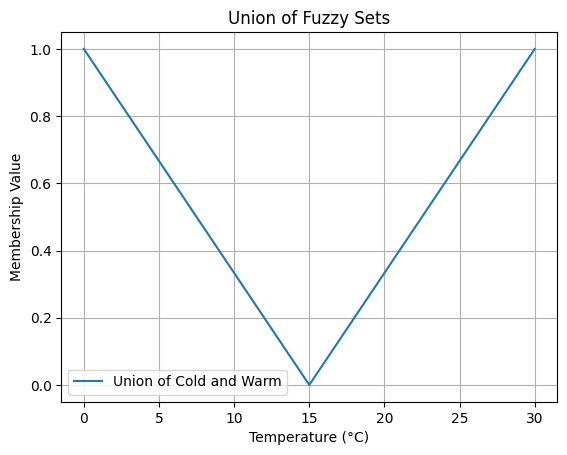

In [ ]:
# Plotting Union of Fuzzy Sets
for pair, values in union_values.items():
    plt.plot(x_values, values, label=f"Union of {pair[0]} and {pair[1]}")

plt.title("Union of Fuzzy Sets")
plt.xlabel(independent_variable)          #combination membership values between hot and cold
plt.ylabel("Membership Value")
plt.legend()
plt.grid(True)
plt.show()


Intersection of the Fuzzy sets

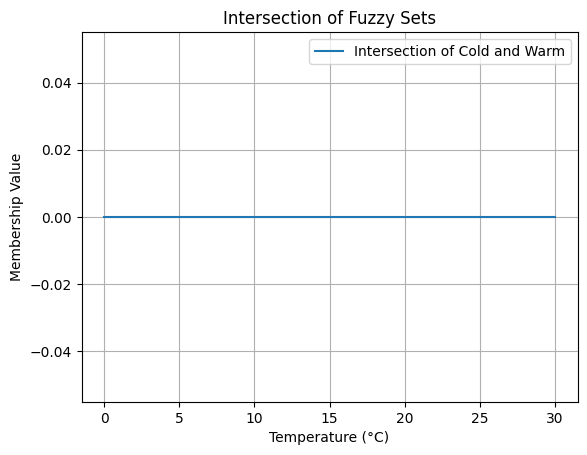

In [ ]:
# Plotting Intersection of Fuzzy Sets
for pair, values in intersection_values.items():
    plt.plot(x_values, values, label=f"Intersection of {pair[0]} and {pair[1]}")

plt.title("Intersection of Fuzzy Sets")
plt.xlabel(independent_variable)             #overlapping membership values
plt.ylabel("Membership Value")
plt.legend()
plt.grid(True)
plt.show()


Complement of the Fuzzy sets

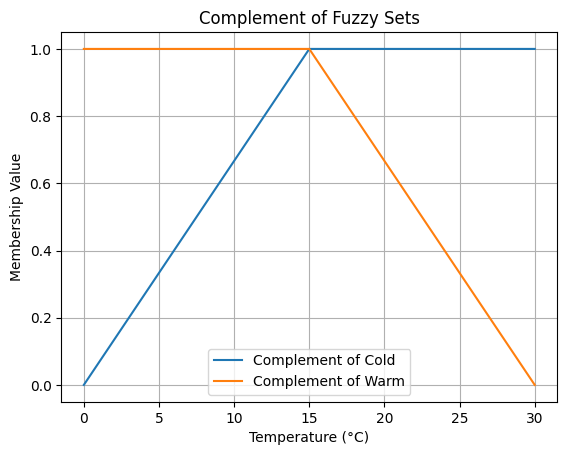

In [ ]:
# Plotting Complement of Fuzzy Sets
for fuzzy_set_name, values in complement_values.items():
    plt.plot(x_values, values, label=f"Complement of {fuzzy_set_name}")

plt.title("Complement of Fuzzy Sets")
plt.xlabel(independent_variable)
plt.ylabel("Membership Value")
plt.legend()
plt.grid(True)
plt.show()
